# Laboratory 1 - Tensorflow

### Step1. Warm-up
### Let's start with basic commands in Tensorflow. Run following code in Python and analyze the output:

In [2]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!') 
print(hello)

tf.Tensor(b'Hello, TensorFlow!', shape=(), dtype=string)


### Step2. Implement OCR code in Tensorflow

In [3]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

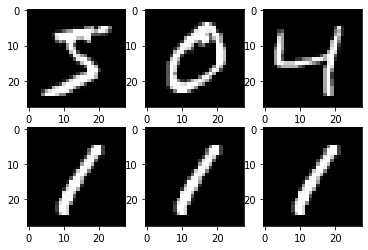

In [4]:
import matplotlib.pyplot as plt
plt.subplot(231)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(232)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(233)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(234)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.subplot(235)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.subplot(236)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

#### Normalize the data by dividing the values by 255.

In [5]:
X_train = X_train / 255
X_test = X_test / 255

#### Next step is to design the model. For this part we use only one hidden layer with 128 nodes on it.

In [6]:
model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(input_shape=(28, 28)), 
                                    tf.keras.layers.Dense(128, activation='sigmoid'), 
                                    tf.keras.layers.Dense(10)
])

In [7]:
predictions = model(X_train[:1]).numpy() 
predictions

array([[ 0.5986853 , -0.6095371 ,  0.47137007,  0.27930477, -0.32898095,
        -0.40890428, -0.09351788, -0.5848508 ,  0.25348786,  0.05951521]],
      dtype=float32)

In [8]:
tf.nn.sigmoid(predictions).numpy()

array([[0.64535546, 0.3521648 , 0.615708  , 0.56937575, 0.4184886 ,
        0.3991749 , 0.47663754, 0.35781723, 0.5630348 , 0.5148744 ]],
      dtype=float32)

#### Define the loss function. We use a cross entropy as the loss function.

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [10]:
loss_fn(y_train[:1], predictions).numpy()

2.7592793

#### Design the model and start training.

In [11]:
model.compile(optimizer='SGD', loss=loss_fn, metrics=['accuracy']) 
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.8208 - accuracy: 0.5512
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7797 - accuracy: 0.8376
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5487 - accuracy: 0.8677
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4551 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4108 - accuracy: 0.8909


In [12]:
scores = model.evaluate(X_test, y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))

313/313 - 0s - loss: 0.3739 - accuracy: 0.8996
Baseline Error: 10.04%
Baseline Accuracy: 89.96%


#### Add another layer with 128 nodes, increase the epochs to 10 and report the result.

In [13]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)), 
                                    tf.keras.layers.Dense(128, activation='sigmoid'), 
                                    tf.keras.layers.Dense(128, activation='sigmoid'), 
                                    tf.keras.layers.Dense(10)
])
model.compile(optimizer='SGD',
             loss=loss_fn,
             metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=10)
model.evaluate(X_test, y_test, verbose=2)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 2.2703 - accuracy: 0.2021 - val_loss: 2.1005 - val_accuracy: 0.4710
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 2.0004 - accuracy: 0.5323 - val_loss: 1.5628 - val_accuracy: 0.6372
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.4263 - accuracy: 0.6741 - val_loss: 1.0404 - val_accuracy: 0.7832
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9870 - accuracy: 0.7674 - val_loss: 0.7750 - val_accuracy: 0.8201
Epoch 5/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.7637 - accuracy: 0.8095 - val_loss: 0.6325 - val_accuracy: 0.8397
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6301 - accuracy: 0.8371 - val_loss: 0.5477 - val_accuracy: 0.8617
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5623 - accuracy: 0.8516 - val_loss: 0.4919 - val_accuracy:

[0.39946234226226807, 0.8895000219345093]

In [14]:
scores = model.evaluate(X_test, y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))

313/313 - 0s - loss: 0.3995 - accuracy: 0.8895
Baseline Error: 11.05%
Baseline Accuracy: 88.95%


#### Draw the learning curves.

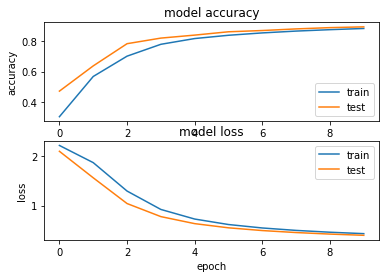

In [15]:
plt.subplot(2,1,1) 
plt.plot(hist.history['accuracy']) 
plt.plot(hist.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2) 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

##### Model is underfitting.

##### Add the dropout to the model.

In [16]:
model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(input_shape=(28, 28)), 
                                    tf.keras.layers.Dense(128, activation='sigmoid'), 
                                    tf.keras.layers.Dense(128, activation='sigmoid'), 
                                    tf.keras.layers.Dropout(0.2), 
                                    tf.keras.layers.Dense(10)
])
model.compile(optimizer='SGD',
             loss=loss_fn,
             metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=10)
model.evaluate(X_test, y_test, verbose=2)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 2.3216 - accuracy: 0.1236 - val_loss: 2.1440 - val_accuracy: 0.5295
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 2.1114 - accuracy: 0.2883 - val_loss: 1.7282 - val_accuracy: 0.6363
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.6454 - accuracy: 0.5149 - val_loss: 1.1710 - val_accuracy: 0.7192
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.1711 - accuracy: 0.6514 - val_loss: 0.8651 - val_accuracy: 0.7879
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9198 - accuracy: 0.7207 - val_loss: 0.7040 - val_accuracy: 0.8267
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7743 - accuracy: 0.7679 - val_loss: 0.6045 - val_accuracy: 0.8480
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6727 - accuracy: 0.7994 - val_loss: 0.5346 - val_accuracy:

[0.4271280765533447, 0.8808000087738037]

In [17]:
scores = model.evaluate(X_test, y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))

313/313 - 0s - loss: 0.4271 - accuracy: 0.8808
Baseline Error: 11.92%
Baseline Accuracy: 88.08%


#### Now train the model again with adding stochastic gradient descent with batch size of 200.

In [18]:
model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(input_shape=(28, 28)), 
                                    tf.keras.layers.Dense(128, activation='sigmoid'), 
                                    tf.keras.layers.Dense(128, activation='sigmoid'), 
                                    tf.keras.layers.Dropout(0.2), 
                                    tf.keras.layers.Dense(10)
])
model.compile(optimizer='SGD',
             loss=loss_fn,
             metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=200)
model.evaluate(X_test, y_test, verbose=2)

Epoch 1/10
240/240 [==============================] - 1s 5ms/step - loss: 2.3917 - accuracy: 0.1005 - val_loss: 2.2841 - val_accuracy: 0.1596
Epoch 2/10
240/240 [==============================] - 1s 3ms/step - loss: 2.3292 - accuracy: 0.1141 - val_loss: 2.2643 - val_accuracy: 0.1447
Epoch 3/10
240/240 [==============================] - 1s 3ms/step - loss: 2.3019 - accuracy: 0.1306 - val_loss: 2.2421 - val_accuracy: 0.2709
Epoch 4/10
240/240 [==============================] - 1s 4ms/step - loss: 2.2817 - accuracy: 0.1435 - val_loss: 2.2181 - val_accuracy: 0.3073
Epoch 5/10
240/240 [==============================] - 1s 5ms/step - loss: 2.2594 - accuracy: 0.1660 - val_loss: 2.1912 - val_accuracy: 0.4058
Epoch 6/10
240/240 [==============================] - 1s 4ms/step - loss: 2.2272 - accuracy: 0.1922 - val_loss: 2.1597 - val_accuracy: 0.4618
Epoch 7/10
240/240 [==============================] - 1s 4ms/step - loss: 2.1930 - accuracy: 0.2194 - val_loss: 2.1227 - val_accuracy: 0.5041
Epoch 

[1.9559279680252075, 0.5789999961853027]

In [20]:
import pandas as pd
file = "/Users/hit028/Desktop/pima-indians-diabetes.csv"
dataframe = pd.read_csv(file)
dataframe.head()

,ID,preg_no,plasma,diastolic,triceps,serum,mass,pedigree,age,diabete
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [21]:
dataframe.describe()

,ID,preg_no,plasma,diastolic,triceps,serum,mass,pedigree,age,diabete
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,384.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,192.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,384.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,576.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,768.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
y2 = dataframe['diabete']
X2 = dataframe.drop(['ID','diabete'], axis=1)

In [23]:
from sklearn.preprocessing import MinMaxScaler

X2 = MinMaxScaler().fit_transform(X2) 

In [24]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=1234)

#### Design a neural network with 2 hidden layers (hidden layer 1 with 12 nodes and hidden layer 2 with 8 nodes), report the accuracy and draw the learning curves. Apply a dropout to see if you could get any better result. Use ‘adam’ as optimizer.

In [25]:
model32 = tf.keras.models.Sequential([ tf.keras.layers.Dense(12, input_dim=8, activation='relu'), 
                                    tf.keras.layers.Dense(8, activation='relu'),  
                                    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [26]:
model32.compile(optimizer='adam',
             loss=loss_fn,
             metrics=['accuracy'])

hist2 = model32.fit(X2_train, y2_train, validation_split=0.2, epochs=10)
model32.evaluate(X2_test, y2_test, verbose=2)

Epoch 1/10
16/16 [==============================] - 1s 16ms/step - loss: 0.6740 - accuracy: 0.6115 - val_loss: 0.6443 - val_accuracy: 0.7073
Epoch 2/10
16/16 [==============================] - 0s 5ms/step - loss: 0.6567 - accuracy: 0.6511 - val_loss: 0.6310 - val_accuracy: 0.7073
Epoch 3/10
16/16 [==============================] - 0s 5ms/step - loss: 0.6598 - accuracy: 0.6258 - val_loss: 0.6255 - val_accuracy: 0.7073
Epoch 4/10
16/16 [==============================] - 0s 5ms/step - loss: 0.6374 - accuracy: 0.6671 - val_loss: 0.6197 - val_accuracy: 0.7073
Epoch 5/10
16/16 [==============================] - 0s 11ms/step - loss: 0.6511 - accuracy: 0.6281 - val_loss: 0.6173 - val_accuracy: 0.7073
Epoch 6/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6470 - accuracy: 0.6262 - val_loss: 0.6153 - val_accuracy: 0.7073
Epoch 7/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6294 - accuracy: 0.6581 - val_loss: 0.6084 - val_accuracy: 0.7073
Epoch 8/10
16/16 [

[0.6242331266403198, 0.649350643157959]

In [27]:
scores32 = model32.evaluate(X2_test, y2_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores32[1]*100))
print("Accuracy: %.2f%%" % (scores32[1]*100))

5/5 - 0s - loss: 0.6242 - accuracy: 0.6494
Baseline Error: 35.06%
Accuracy: 64.94%


In [28]:
model32 = tf.keras.models.Sequential([ tf.keras.layers.Dense(12, activation='relu'), 
                                    tf.keras.layers.Dense(8, activation='relu'), 
                                    tf.keras.layers.Dropout(0.2), 
                                    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [29]:
model32.compile(optimizer='adam',
             loss=loss_fn,
             metrics=['accuracy'])

hist2 = model32.fit(X2_train, y2_train, validation_split=0.2, epochs=10)
model32.evaluate(X2_test, y2_test, verbose=2)

Epoch 1/10
16/16 [==============================] - 1s 13ms/step - loss: 0.6807 - accuracy: 0.6302 - val_loss: 0.6588 - val_accuracy: 0.6748
Epoch 2/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6575 - accuracy: 0.6540 - val_loss: 0.6479 - val_accuracy: 0.7073
Epoch 3/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6700 - accuracy: 0.6549 - val_loss: 0.6423 - val_accuracy: 0.7073
Epoch 4/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6656 - accuracy: 0.6317 - val_loss: 0.6364 - val_accuracy: 0.6992
Epoch 5/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6756 - accuracy: 0.6550 - val_loss: 0.6331 - val_accuracy: 0.6911
Epoch 6/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6419 - accuracy: 0.6713 - val_loss: 0.6258 - val_accuracy: 0.6911
Epoch 7/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6413 - accuracy: 0.6694 - val_loss: 0.6210 - val_accuracy: 0.6992
Epoch 8/10
16/16 [=

[0.6272091269493103, 0.6363636255264282]